In [78]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

### Constants

In [79]:
N = 5
k1 = 1
k2 = 1
omega = 1

### States

In [80]:
psi = fock(N, 0)
psi2 = fock(N, N - 1)

psi3 = (psi + psi2).unit()

In [81]:
rho2 = fock_dm(N,1).unit()
rho2

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

### QHO Operators

In [82]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [98]:
H = omega * adag * a

gain = k1 * lindblad_dissipator(adag)
loss = k2 * lindblad_dissipator(a**2)

### Simulation

In [99]:
times = np.linspace(0.0, 10.0, 100)
result = mesolve(H, psi3, times, [gain, loss], [psi * psi.dag(), psi2 * psi2.dag()])

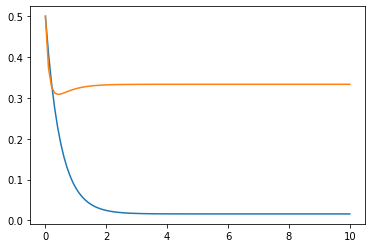

In [100]:
plt.plot(result.times, np.array(result.expect).T)

In [105]:
wigner_rep = wigner(rho, np.linspace(-2, 2), np.linspace(-2, 2))
wigner_rep

array([[0.00160172, 0.00211141, 0.00274633, ..., 0.00274633, 0.00211141,
        0.00160172],
       [0.00211141, 0.00277778, 0.00360557, ..., 0.00360557, 0.00277778,
        0.00211141],
       [0.00274633, 0.00360557, 0.0046698 , ..., 0.0046698 , 0.00360557,
        0.00274633],
       ...,
       [0.00274633, 0.00360557, 0.0046698 , ..., 0.0046698 , 0.00360557,
        0.00274633],
       [0.00211141, 0.00277778, 0.00360557, ..., 0.00360557, 0.00277778,
        0.00211141],
       [0.00160172, 0.00211141, 0.00274633, ..., 0.00274633, 0.00211141,
        0.00160172]])

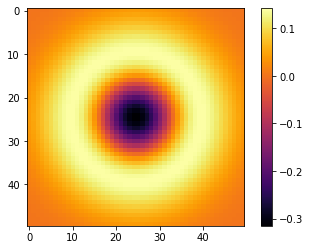

In [114]:
plt.imshow(wigner_rep, 'inferno')
plt.colorbar()